In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score, \
    accuracy_score, precision_score, recall_score, roc_auc_score, log_loss
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_dataset():
    df = pd.read_csv("diabetes.csv")
    y = df["Outcome"]
    x = df.drop("Outcome", axis=1)

    return train_test_split(x, y, test_size=0.2, random_state=42)


In [3]:

# task1

X_train, X_test, y_train, y_test = load_dataset()

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(accuracy_score(y_test, predict), precision_score(y_test, predict), recall_score(y_test, predict))

0.7272727272727273 0.6140350877192983 0.6363636363636364


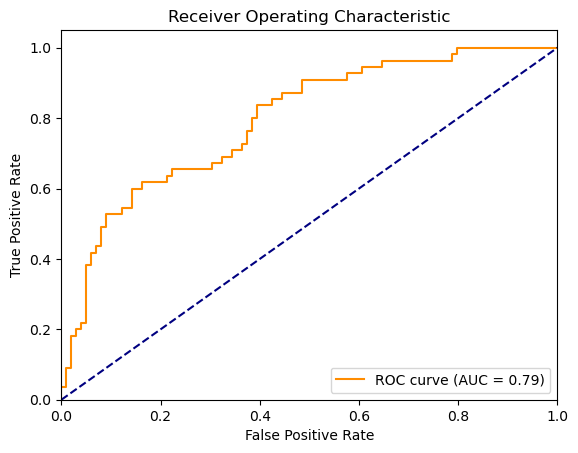

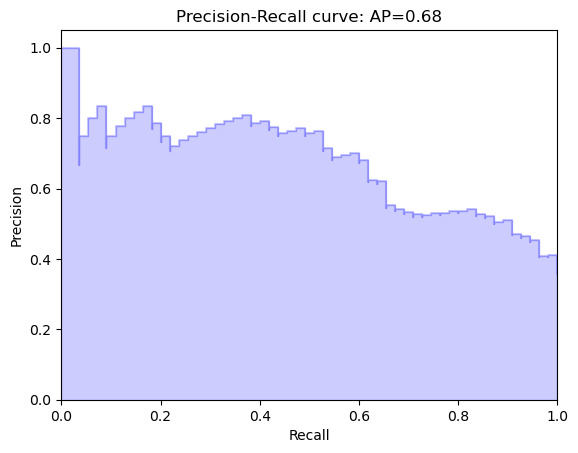

In [4]:
# task2 and 3

X_train, X_test, y_train, y_test = load_dataset()
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_test, probs)
average_precision = average_precision_score(y_test, probs)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

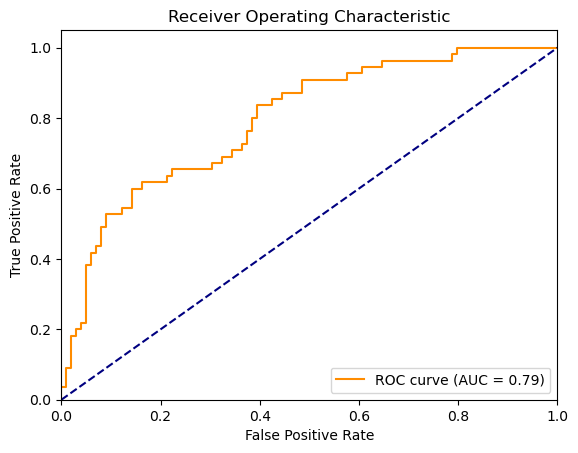

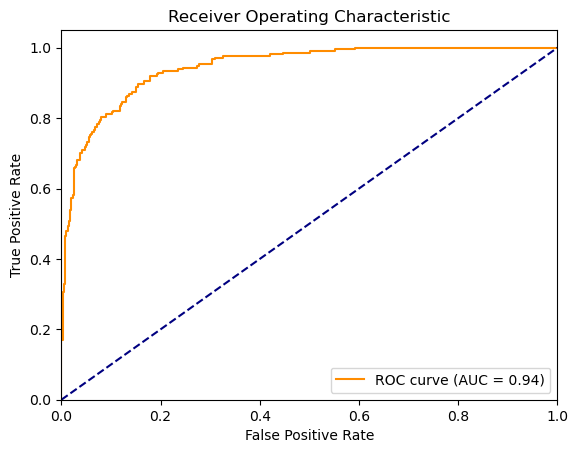

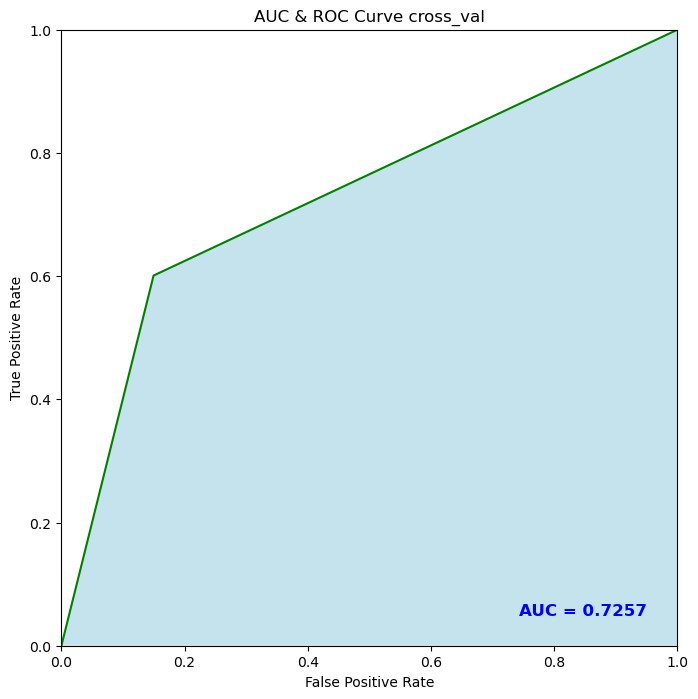

In [5]:
# task4
X_train, X_test, y_train, y_test = load_dataset()
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, y_train)
probs_test = model.predict_proba(X_test)[:, 1]
probs_train = model.predict_proba(X_train)[:, 1]

fpr, tpr, _ = roc_curve(y_test, probs_test)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, _ = roc_curve(y_train, probs_train)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


y_pred2 = cross_val_predict(model, X_train, y_train, cv=3)
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_train, y_pred2)
auc = roc_auc_score(y_train, y_pred2)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve cross_val")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [6]:
X_train, X_test, y_train, y_test = load_dataset()
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb_model.fit(X_train, y_train)

ab_model = AdaBoostClassifier()

ab_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

y_clf_gb = gb_model.predict(X_test)
y_clf_ab = ab_model.predict(X_test)

print(f'Gradient boosting log loss: {log_loss(y_test, y_clf_gb)}')
print(f'AdaBoost log loss: {log_loss(y_test, y_clf_ab)}')

Gradient boosting log loss: 9.83008728794104
AdaBoost log loss: 9.59603759060911
